<a href="https://colab.research.google.com/github/the-redlord/Image_denoising-keras/blob/master/ImageDenoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK #1: PROJECT OVERVIEW

![image1](images/image1.png)

![image2](images/image2.png)

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load dataset 
(X_train, y_train),(X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


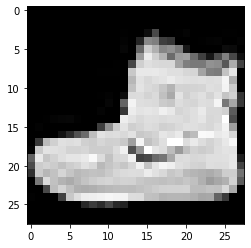

In [5]:
# Visualize a sample image
plt.imshow(X_train[0],cmap='gray')

In [6]:
# check out the shape of the training data
X_train.shape

(60000, 28, 28)

In [7]:
# check out the shape of the testing data
X_test.shape

(10000, 28, 28)

In [8]:
y_train.shape

(60000,)

In [9]:
y_test.shape

(10000,)

# TASK #3: PERFORM DATA VISUALIZATION

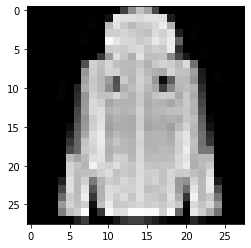

In [10]:
# Let's view some images!
i = random.randint(1,60000)
plt.imshow(X_train[i], cmap='gray')

In [11]:
label = y_train[i]
label

4

In [ ]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training



# TASK #4: PERFORM DATA PREPROCESSING

In [ ]:
# normalize data

In [ ]:
# add some noise

In [ ]:
# add noise to testing dataset

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND AUTOENCODERS

![image3](images/image3.png)

![image4](images/image4.png)

![image5](images/image5.png)

![image6](images/image6.png)

# TASK #6: BUILD AND TRAIN AUTOENCODER DEEP LEARNING MODEL

In [ ]:
autoencoder = tf.keras.models.Sequential()


In [ ]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

In [ ]:
autoencoder.fit(noise_dataset.reshape(-1, 28, 28, 1),
               X_train.reshape(-1, 28, 28, 1),
               epochs = 10,
               batch_size = 200,
               validation_data = (noise_test_dataset.reshape(-1, 28, 28, 1), X_test.reshape(-1, 28, 28, 1)))

# TASK #7: EVALUATE TRAINED MODEL PERFORMANCE

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_test_set[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# EXCELLENT WORK!

- 0 = T-shirt/top
- 1 = Trouser
- 2 = Pullover
- 3 = Dress
- 4 = Coat
- 5 = Sandal
- 6 = Shirt
- 7 = Sneaker
- 8 = Bag
- 9 = Ankle boot